In [1]:
import requests
import os
import json
import numpy as np
import pandas as pd
import time
import matplotlib.pylab as plt
import datetime
import pytz
import seaborn as sns

## load tweet counts (api) from csv

(17532.0, 18993.0)

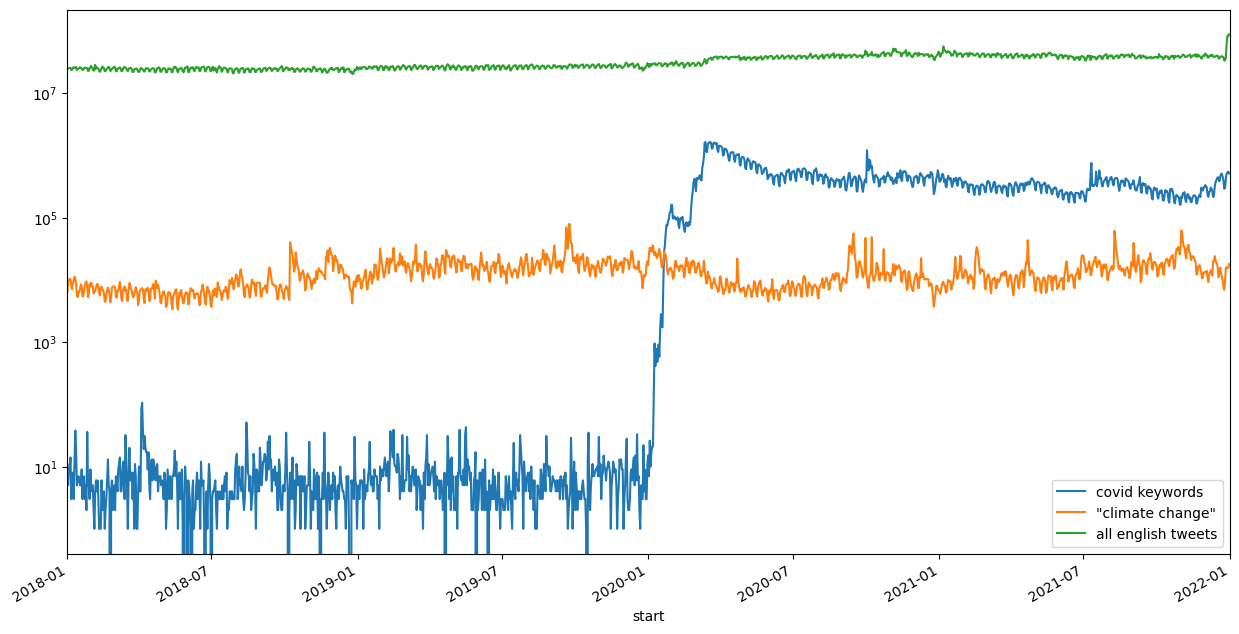

In [2]:
# show cc + covid counts
fig, ax = plt.subplots(1, figsize=(15, 8))

#cccov_tweet_counts = pd.read_csv("./data/tweet-counts/covid_cc_tweet_counts_daily_2006-2021-rt_specific2.csv", index_col=0, parse_dates=[1,2,4])
#cccov_tweet_counts.plot(ax=ax, x='start', y='tweet_count', figsize=(15,8), label='"climate change" AND covid keywords')

covid_tc_specific = pd.read_csv("./data/tweet-counts/covid_tweet_counts_daily_2006-2021-rt_specific2.csv", index_col=0, parse_dates=[1,2,4])
covid_tc_specific.plot(ax=ax, x='start', y='tweet_count', figsize=(15,8), label="covid keywords")

cc_tweet_counts = pd.read_csv("./data/tweet-counts/cc_tweet_counts_daily_2006-2021-rt.csv", index_col=0, parse_dates=[1,2,4])
cc_tweet_counts.plot(ax=ax, x='start', y='tweet_count', figsize=(15,8), label='"climate change"')

# also show total tweets on top
en_tweet_counts_daily = pd.read_csv("data/tweet-counts/english_tweet_counts_daily_2006-2021-rt.csv", parse_dates=[0])
en_tweet_counts_daily.plot(ax=ax, x='start', y='tweet_count', label="all english tweets")

ax.set_yscale('log')

# set limit to plotted data
ax.set_xlim([datetime.date(2018, 1, 1), datetime.date(2022, 1, 1)])

#fig.savefig("figures/cc+covid+all_tweet_count_twapi-rt_specific2_log.png", bbox_inches='tight', dpi=150)

# share of climate change tweets

In [3]:
cc_tweet_counts = pd.read_csv("./data/tweet-counts/cc_tweet_counts_daily_2006-2021-rt.csv", index_col=0, parse_dates=[1,2,4])

(17532.0, 18993.0)

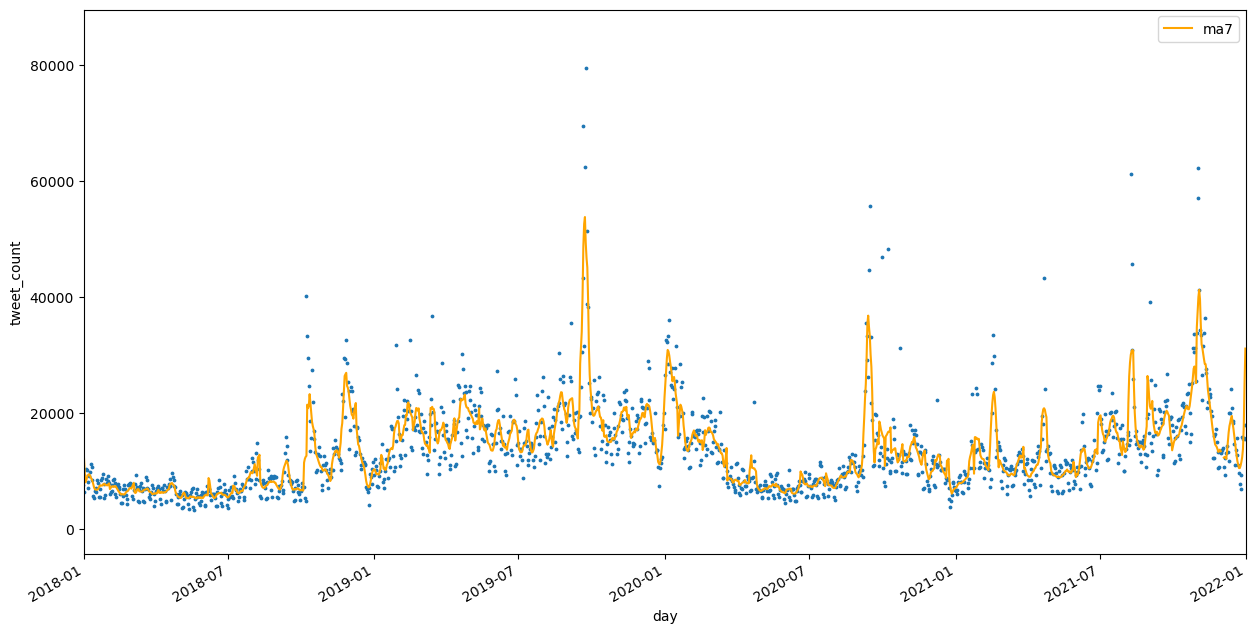

In [4]:
cc_tweet_counts["ma7"] = cc_tweet_counts["tweet_count"].rolling(window=7, center=True).mean()

#cc_tweet_counts.plot(figsize=(15,8), x='day', y=['tweet_count', 'ma7'])

fig, ax = plt.subplots(1, figsize=(15, 8))
cc_tweet_counts.plot.scatter(ax=ax, x='day', y='tweet_count', s=3)
cc_tweet_counts.plot(ax=ax, x='day', y='ma7', color='orange')

# set limit to plotted data
ax.set_xlim([datetime.date(2018, 1, 1), datetime.date(2022, 1, 1)])

#plt.ylabel("share of cc tweets [%]")
#ax.vlines([datetime.date(2020, 1, 1), datetime.date(2021, 1, 1)], 0, 0.3, color='k')
#fig.savefig("figures/climate_change_tweet_count_twapi-rt.png", bbox_inches='tight', dpi=150)

In [5]:
all_tweet_counts = en_tweet_counts_daily.copy()
all_tweet_counts = all_tweet_counts.rename({"start": "day", "tweet_count": "twc_all"}, axis=1)

In [6]:
tweet_shares = all_tweet_counts.merge(cc_tweet_counts[["tweet_count", "day"]].rename({"tweet_count": "twc_cc"}, axis=1), on='day')

tweet_shares["shares_cc"] = 100 * tweet_shares["twc_cc"] / tweet_shares["twc_all"]
tweet_shares["shares_cc_ma7"] = tweet_shares["shares_cc"].rolling(window=7, center=True).mean()

# merge also covid tweet counts
tweet_shares = tweet_shares.merge(covid_tc_specific[["tweet_count", "day"]].rename({"tweet_count": "twc_cov"}, axis=1), on='day')


tweet_shares["shares_cov"] = 100 * tweet_shares["twc_cov"] / tweet_shares["twc_all"]
tweet_shares["shares_cov_ma7"] = tweet_shares["shares_cov"].rolling(window=7, center=True).mean()

tweet_shares

day   twc_all  twc_cc  shares_cc  shares_cc_ma7  twc_cov  \
0    2006-03-21        20       0   0.000000            NaN        0   
1    2006-03-22        22       0   0.000000            NaN        0   
2    2006-03-23        47       0   0.000000            NaN        0   
3    2006-03-24        54       0   0.000000        0.00000        0   
4    2006-03-25        38       0   0.000000        0.00000        0   
...         ...       ...     ...        ...            ...      ...   
5760 2021-12-27  37309443   15806   0.042365        0.02480   418404   
5761 2021-12-28  62426040   15552   0.024913        0.02473   512021   
5762 2021-12-29  83639352   15654   0.018716            NaN   523262   
5763 2021-12-30  83625259   15433   0.018455            NaN   549664   
5764 2021-12-31  88162284   17883   0.020284            NaN   511494   

      shares_cov  shares_cov_ma7  
0       0.000000             NaN  
1       0.000000             NaN  
2       0.000000             NaN  
3       0.000000        0.000000  
4       0.000000        0.000000  
...          ...             ...  
5760    1.121443        0.864117  
5761    0.820204        0.795916  
5762    0.625617             NaN  
5763    0.657294             NaN  
5764    0.580173             NaN  

[5765 rows x 8 columns]

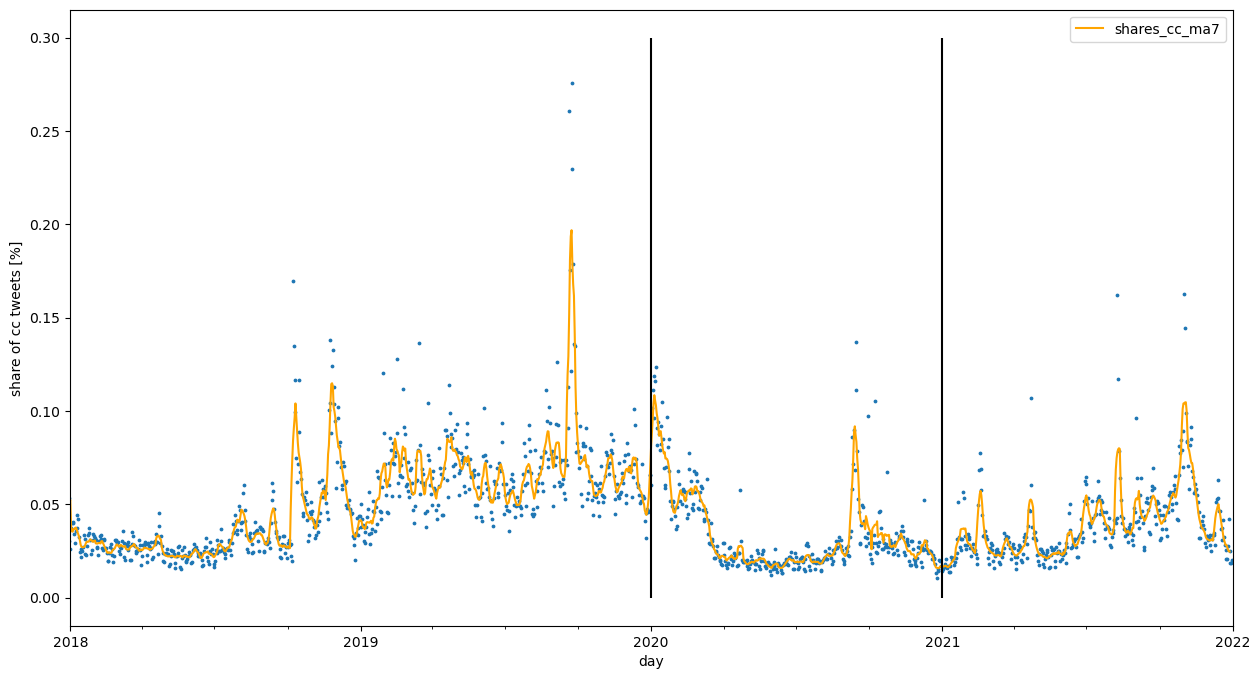

In [7]:
fig, ax = plt.subplots(1, figsize=(15, 8))
tweet_shares.plot.scatter(ax=ax, x='day', y='shares_cc', s=3)
tweet_shares.plot(ax=ax, x='day', y='shares_cc_ma7', color='orange')

# set limit to plotted data
ax.set_xlim([datetime.date(2018, 1, 1), datetime.date(2022, 1, 1)])

plt.ylabel("share of cc tweets [%]")
ax.vlines([datetime.date(2020, 1, 1), datetime.date(2021, 1, 1)], 0, 0.3, color='k')
#fig.savefig("figures/climate_change_tweet_shares-rt.png", bbox_inches='tight', dpi=150)

(17532.0, 18993.0)

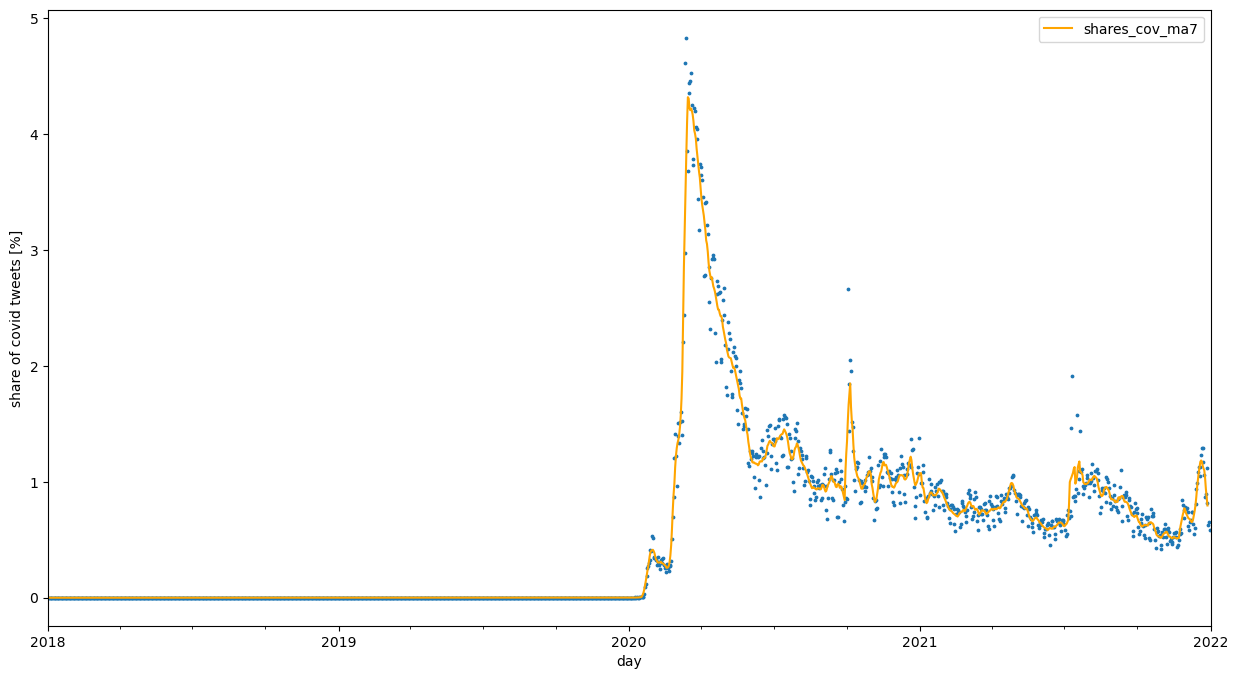

In [8]:
fig, ax = plt.subplots(1, figsize=(15, 8))
tweet_shares.plot.scatter(ax=ax, x='day', y='shares_cov', s=3)
tweet_shares.plot(ax=ax, x='day', y='shares_cov_ma7', color='orange')
plt.ylabel("share of covid tweets [%]")

# set limit to plotted data
ax.set_xlim([datetime.date(2018, 1, 1), datetime.date(2022, 1, 1)])

#ax.vlines([datetime.date(2020, 1, 1), datetime.date(2021, 1, 1)], 0, 0.3, color='k')
#fig.savefig("figures/climate_change_tweet_shares-rt.png", bbox_inches='tight', dpi=150)

In [9]:
tweet_shares["dayofyear"] = tweet_shares["day"].dt.dayofyear
tweet_shares["year"] = tweet_shares["day"].dt.year

Text(0.5, 0, 'day of year')

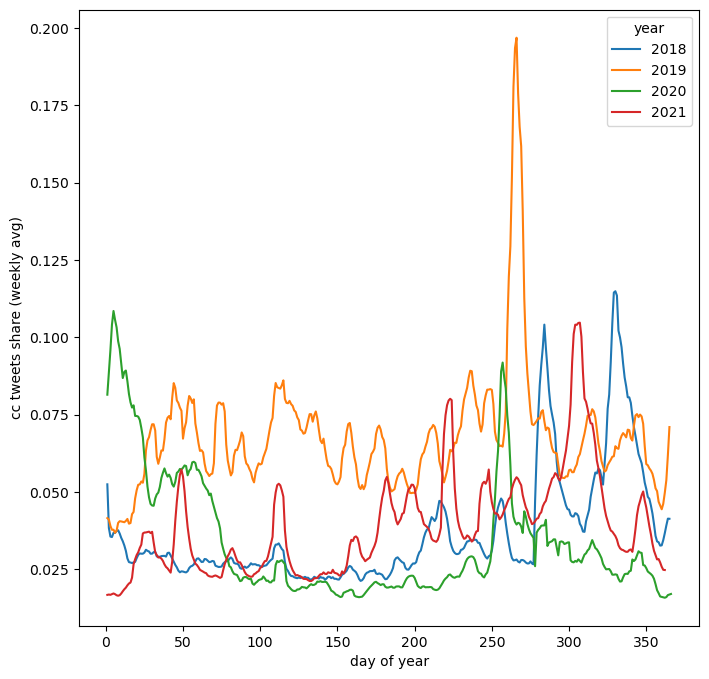

In [10]:
periodic_df = pd.pivot(tweet_shares[tweet_shares["year"] >= 2018], columns='year', index='dayofyear', values="shares_cc_ma7")

fig, ax = plt.subplots(1, 1, figsize=(8,8))

periodic_df.plot(ax=ax)

#ax.set_yscale('log')
ax.set_xlabel('')
ax.set_ylabel('cc tweets share (weekly avg)')
ax.set_xlabel('day of year')
#ax.set_xlim([datetime(2019, 1, 1, 0, 0), datetime(2021,3, 19, 0, 0)])
#fig.savefig("figures/cc-shares_rolling_year_plot.png", dpi=150)

## Quarterly decline and resurgence plot

In [11]:
values = 'tweet counts' # 'emissions' # 'tweet counts'

# preprocess for display: tweet counts
if values == 'tweet counts':

    tweet_counts_grouped = cc_tweet_counts[["day", "tweet_count"]].groupby(pd.Grouper(key="day",freq='Q')).aggregate(["sum", "mean", "std"])
    tweet_counts_grouped = tweet_counts_grouped.reset_index()
    tweet_counts_grouped["year"] = tweet_counts_grouped["day"].dt.year
    tweet_counts_grouped["quarter"] = (tweet_counts_grouped["day"].dt.month / 3).astype('int')
    tweet_counts_grouped[("tweet_count", "coefvar")] = tweet_counts_grouped[("tweet_count", "std")] / tweet_counts_grouped[("tweet_count", "mean")]

    filtered_df = tweet_counts_grouped[tweet_counts_grouped["year"].isin([2019, 2020, 2021])]

    filtered_df[("tweet_count", "diff")] = filtered_df[[("tweet_count", "sum"), ("quarter", "")]].groupby("quarter").diff()
    filtered_df[("tweet_count", "pct_diff")] = 100 * filtered_df[("tweet_count", "diff")] / filtered_df[("tweet_count", "sum")].shift(4)

    formatted_df = filtered_df[[("tweet_count", "sum"), ("year", ""), ("quarter", "")]]
    formatted_df.columns = ["tweet_count", "year", "quarter"]
    formatted_df = formatted_df.pivot(index="quarter", columns="year", values="tweet_count")

    pct_resurge = 100 * filtered_df[filtered_df["year"] == 2021][("tweet_count", "diff")].values / \
    filtered_df[filtered_df["year"] == 2019][("tweet_count", "sum")].values 
    pct_drop = filtered_df[filtered_df[("year", "")] == 2020][("tweet_count", "pct_diff")].values

/tmp/ipykernel_47238/964199943.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[("tweet_count", "diff")] = filtered_df[[("tweet_count", "sum"), ("quarter", "")]].groupby("quarter").diff()
/tmp/ipykernel_47238/964199943.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[("tweet_count", "pct_diff")] = 100 * filtered_df[("tweet_count", "diff")] / filtered_df[("tweet_count", "sum")].shift(4)


In [12]:
print(pct_drop)
print(pct_resurge)

[  6.9633203  -57.03197822 -40.2585559  -33.21782509]
[-32.5650885   24.06483483  26.433858    45.75748719]


In [13]:
# preprocess for display: tweet shares
if values == 'tweet shares':
    
    tweet_shares_grouped = tweet_shares[["day", "twc_all", "twc_cc"]].groupby(pd.Grouper(key="day",freq='Q')).sum()
    tweet_shares_grouped = tweet_shares_grouped.reset_index()
    tweet_shares_grouped["year"] = tweet_shares_grouped["day"].dt.year
    tweet_shares_grouped["quarter"] = (tweet_shares_grouped["day"].dt.month / 3).astype('int')
    tweet_shares_grouped["shares_cc"] = 100 * tweet_shares_grouped["twc_cc"] / tweet_shares_grouped["twc_all"]
    #tweet_shares_grouped
    
    filtered_df = tweet_shares_grouped[tweet_shares_grouped["year"].isin([2018, 2019, 2020, 2021])]

    filtered_df["shares_cc_diff"] = filtered_df[["shares_cc", "quarter"]].groupby("quarter").diff()
    filtered_df[("shares_cc_pct_diff")] = 100 * filtered_df["shares_cc_diff"] / filtered_df["shares_cc"].shift(4)

    formatted_df = filtered_df[["shares_cc", "year", "quarter"]]
    #formatted_df.columns = ["shares_cc", "year", "quarter"]
    formatted_df = formatted_df.pivot(index="quarter", columns="year", values="shares_cc")

    pct_resurge = 100 * filtered_df[filtered_df["year"] == 2021]["shares_cc_diff"].values / \
    filtered_df[filtered_df["year"] == 2019]["shares_cc"].values 
    pct_drop = filtered_df[filtered_df["year"] == 2020]["shares_cc_pct_diff"].values

In [14]:
print(pct_drop)
print(pct_resurge)

[  6.9633203  -57.03197822 -40.2585559  -33.21782509]
[-32.5650885   24.06483483  26.433858    45.75748719]


In [15]:
# preprocess for display: emissions data
if values == 'emissions':

    # co2 emissions data
    co2emissions = pd.read_csv("data/carbon monitor/carbonmonitor-global_datas_2021-12-14.csv")
    co2emissions['date'] = pd.to_datetime(co2emissions['date'], format="%d/%m/%Y")

    co2emissions = co2emissions.drop('timestamp', axis=1)
    total_co2emissions = co2emissions.groupby('date').sum()
    quarterly_co2emissions = total_co2emissions.groupby(pd.Grouper(freq='Q')).aggregate(["sum", "mean", "std"])
    quarterly_co2emissions = quarterly_co2emissions.reset_index()
    quarterly_co2emissions["year"] = quarterly_co2emissions["date"].dt.year
    quarterly_co2emissions["quarter"] = (quarterly_co2emissions["date"].dt.month / 3).astype('int')
    quarterly_co2emissions[("value", "coefvar")] = quarterly_co2emissions[("value", "std")] / tweet_counts_grouped[("tweet_count", "mean")]
    
    filtered_df = quarterly_co2emissions[quarterly_co2emissions["year"].isin([2019, 2020, 2021])]

    filtered_df[("value", "diff")] = filtered_df[[("value", "sum"), ("quarter", "")]].groupby("quarter").diff()
    filtered_df[("value", "pct_diff")] = 100 * filtered_df[("value", "diff")] / filtered_df[("value", "sum")].shift(4)

    formatted_df = filtered_df[[("value", "sum"), ("year", ""), ("quarter", "")]]
    formatted_df.columns = ["value", "year", "quarter"]
    formatted_df = formatted_df.pivot(index="quarter", columns="year", values="value")

    pct_resurge = 100 * filtered_df[filtered_df["year"] == 2021][("value", "diff")].values / \
    filtered_df[filtered_df["year"] == 2019][("value", "sum")].values
    pct_resurge[3] = 0
    pct_drop = filtered_df[filtered_df[("year", "")] == 2020][("value", "pct_diff")].values

In [16]:
# for emissions
print(pct_drop)
print(pct_resurge)

[  6.9633203  -57.03197822 -40.2585559  -33.21782509]
[-32.5650885   24.06483483  26.433858    45.75748719]


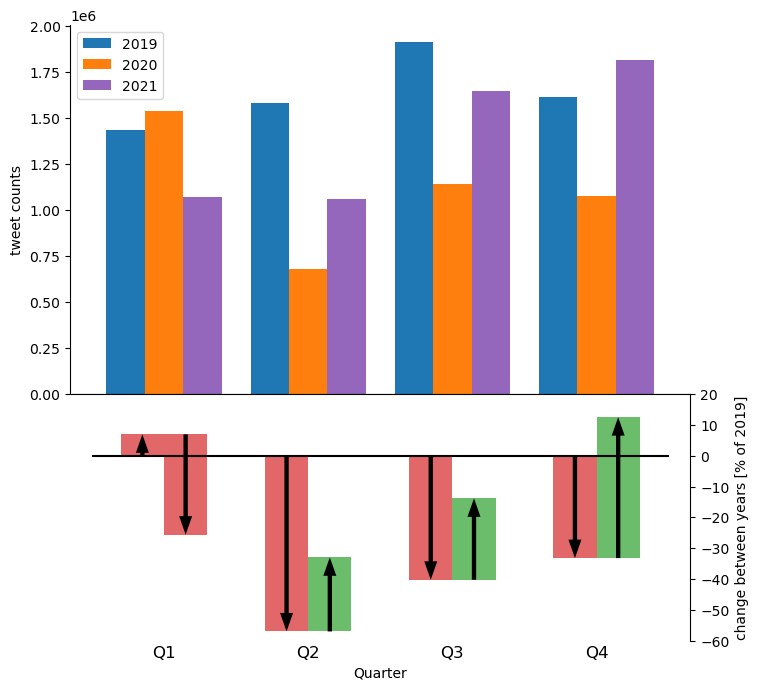

In [17]:
save_plot = False

fig, ax = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1.5,1], 'wspace':0, 'hspace':0},
                       figsize=(8, 8), facecolor='white')

formatted_df.plot.bar(ax=ax[0], width=0.8, color=["tab:blue", "tab:orange", "tab:purple", "tab:olive"])

ax[0].legend(loc="upper left")
if values == "emissions":
    ax[0].set_ylabel("emissions [Mt CO2]")
elif values == "tweet shares":
    ax[0].set_ylabel("tweet shares [%]")
else:
    ax[0].set_ylabel(values)
    
ax[0].spines['top'].set_color('none')
ax[0].spines['right'].set_color('none')

x_positions = [0,1,2,3]
width = 0.3
green = "tab:green"
red = "tab:red"
ax[1].bar(x_positions, pct_drop, width=-width, align="edge",
          color=[red, red, red, red], alpha=0.7)
ax[1].bar(x_positions, pct_resurge, bottom=pct_drop,
          width=width, align='edge', color=[red, green, green, green], alpha=0.7)

for x in x_positions:
    arrow_width = 0.03
    head_width = 3*arrow_width
    if values == "emissions":
        head_length = 20*arrow_width
    else:
        head_length = 200*arrow_width
    ax[1].arrow(x-width/2, 0, 0, pct_drop[x],
                length_includes_head=True, width=arrow_width, fc="k", lw=0,
               head_length=head_length, head_width=head_width) # arguments: x, y, dx, dy

    ax[1].arrow(x+width/2, pct_drop[x], 0, pct_resurge[x],
                length_includes_head=True, width=arrow_width, fc="k", lw=0,
               head_length=head_length, head_width=head_width) # arguments: x, y, dx, dy
    
ax[1].hlines(0, -0.5, 3.5, color='k')
if values == "tweet counts":
    ax[1].set_ylim([-60, 20])
elif values == "tweet shares":
    ax[1].set_ylim([-80, 0])
else:
    ax[1].set_ylim([-13, 0])

ax[1].spines['left'].set_color('none')
ax[1].spines['bottom'].set_color('none')
ax[1].yaxis.set_ticks_position('right')

ax[1].set_ylabel("change between years [% of 2019]")
ax[1].yaxis.set_label_position("right")

ax[1].set_xticklabels(["Q1", "Q2", "Q3", "Q4"], fontsize=12)
ax[1].set_xlabel("Quarter")
ax[1].tick_params(length=0, which="both", axis="x")

if save_plot == True:
    fig.savefig("./figures/absolute+drop_quarterly_{}+2018.png".format(values.replace(" ", "_")),
                bbox_inches='tight', dpi=150, facecolor="white")
    fig.savefig("./figures/absolute+drop_quarterly_{}+2018.svg".format(values.replace(" ", "_")),
                bbox_inches='tight', dpi=150, facecolor="white")

In [18]:
# load other data

# covid cases data
covdata = pd.read_csv("data/our world in data-covid/owid-covid-data.csv")
covdata['date'] = pd.to_datetime(covdata['date'], format="%Y-%m-%d")

# Figure for paper, v4

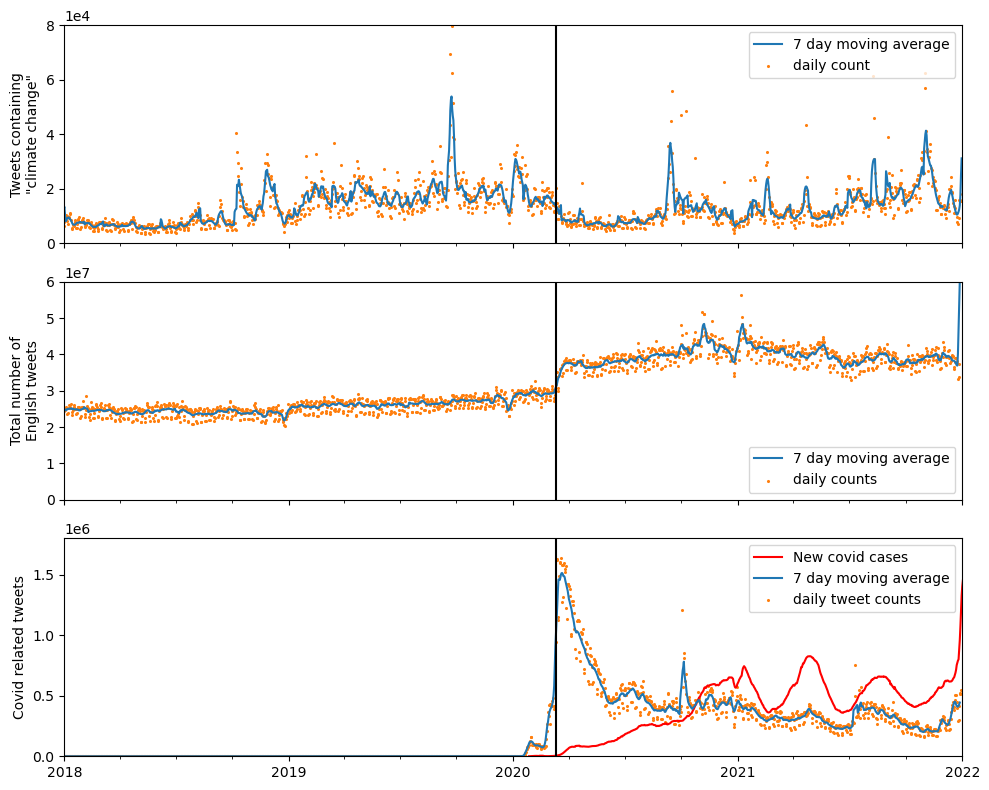

In [19]:
# left panel of figure

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(10,8),
                       gridspec_kw={'height_ratios': [1,1,1]}) #, 'hspace': 0.15})

center_day = datetime.datetime(2020, 3, 11)

# cc tweets
#tweet_shares.plot(ax=ax[0], x='day', y='shares_cc_ma7', color='tab:green',
#                  label='Share of tweets with "climate change"')
#ax[0].set_ylim([0,0.2])

scatter_size = 1.5
scatter_color = 'tab:orange'
line_color = 'tab:blue'

cc_tweet_counts[["tweet_count", "start"]].rolling(window=7, center=True, on="start").mean() \
    .plot(ax=ax[0], x='start', y='tweet_count', label="7 day moving average", color=line_color)
cc_tweet_counts.plot.scatter(ax=ax[0], x='start', y='tweet_count', label='daily count',
                             s=scatter_size, color=scatter_color)


ax[0].vlines(center_day, 0, 80000, 'k')
ax[0].set_ylim([0, 80000])
ax[0].set_ylabel('Tweets containing\n"climate change"')
ax[0].legend(loc='upper right')

#from matplotlib import ticker
#formatter = ticker.ScalarFormatter(useMathText=True)
#formatter.set_scientific(True) 
#formatter.set_powerlimits((-1,1)) 
#ax.yaxis.set_major_formatter(formatter) 

ax[0].ticklabel_format(scilimits=(-1,1), axis='y')
#ax.get_xaxis().get_major_formatter().set_scientific(False)

# total tweet counts
en_tweet_counts_daily[["tweet_count", "start"]].rolling(window=7, center=True, on="start").mean() \
    .plot(ax=ax[1], x='start', y='tweet_count', label="7 day moving average", color=line_color)
en_tweet_counts_daily.plot.scatter(ax=ax[1], x='start', y='tweet_count',
                                   label="daily counts", s=scatter_size, color=scatter_color)

ax[1].vlines(center_day, 0, 6e7, 'k')
ax[1].set_ylim([0, 6e7])
ax[1].set_ylabel('Total number of\nEnglish tweets')
ax[1].legend(loc='lower right')


# cov new cases
covdata[covdata['location'] == 'World'].plot(x='date', y='new_cases_smoothed',
                                             ax=ax[2], label="New covid cases", color="red")

# covid tweet shares
#tweet_shares.plot(ax=ax[0], x='day', y='shares_cov_ma7', color='tab:orange',
#                      label="Tweets with covid keywords")

# covid tweet counts
covid_tc_specific[["tweet_count", "start"]].sort_values("start").rolling(window=7, center=True, on="start").mean() \
    .plot(ax=ax[2], x='start', y='tweet_count', label="7 day moving average", color=line_color)
covid_tc_specific.plot.scatter(ax=ax[2], x='start', y='tweet_count', label="daily tweet counts",
                               s=scatter_size, color=scatter_color)

# covid + climate
#cccov_tweet_counts.plot(ax=ax[2], x='start', y='tweet_count', label='"climate change" AND covid keywords')

ax[2].vlines(center_day, 0, 1.8e6, 'k')
ax[2].set_ylim([0, 1.8e6])
ax[2].set_ylabel("Covid related tweets")
ax[2].set_xlabel("")
ax[2].set_xlim([datetime.datetime(2018, 1, 1, 0, 0), datetime.datetime(2022, 1, 1, 0, 0)])

# ========================================================================

fig.tight_layout()
fig.patch.set_facecolor('white')
fig.savefig("./figures/climate-covid-twitter_time-evolution_v5-tight.png", dpi=150, bbox_inches='tight')